## HOG, Ajuste de Face e Facial Expression

O notebook descreve o pipeline para reconhecimento de expressão utilizando o HOG - Histogram of Oriented Gradients, passando pelas etapas de detecção da face, ajuste de face, cálculo de HOG e predição da expressão.

* Cálculo do HOG - Histogram of Oriented Gradients
* Detecção da Face
* Alinhamento da Face
* Predição da expressão facial na imagem

### Exercício

Construa um **classificador** que utilize as** features extraidas do HOG**  para predizer a expressão facial em uma imagem. 
* Calcule o HOG das imagens do vetor `sample_metadata` e utilize como features
* Calcule e compare a acurácia da rede para o dataset apresentado e exiba a matriz de confusão
* Altere os parâmetros do cálculo do HOG e observe as mudanças na acurácia do **classificador**
*  Exiba alguns exemplos em imagens reais, veja as imagens na pasta `images/`

### Environment setup

Para executar este notebook, realize o download das bibliotecas em anexo e execute a instalação dos pacotes via `apt` e `pip`

In [0]:
#from google.colab import files
#uploaded = files.upload() # then browse, select the files. It's then uploaded

In [1]:
# Download do Dataset, libs e dependencias
!wget https://storage.googleapis.com/ms_geral/1_hog.zip
!unzip 1_hog.zip

--2018-08-04 14:00:28--  https://storage.googleapis.com/ms_geral/1_hog.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.184.128, 2a00:1450:400c:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.184.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98924594 (94M) [application/zip]
Saving to: ‘1_hog.zip’

1_hog.zip           100%[===================>]  94.34M   167MB/s    in 0.6s    

2018-08-04 14:00:28 (167 MB/s) - ‘1_hog.zip’ saved [98924594/98924594]

Archive:  1_hog.zip
  inflating: align_dlib.py           
   creating: dataset/
   creating: dataset/affectNetRed/
   creating: dataset/affectNetRed/anger/
  inflating: dataset/affectNetRed/anger/image0000008.jpg  
  inflating: dataset/affectNetRed/anger/image0000014.jpg  
  inflating: dataset/affectNetRed/anger/image0000038.jpg  
  inflating: dataset/affectNetRed/anger/image0000049.jpg  
  inflating: dataset/affectNetRed/anger/image0000092.jpg  
  inflating: 


  inflating: dataset/affectNetRed/anger/image0003483.jpg  
  inflating: dataset/affectNetRed/anger/image0003499.jpg  
  inflating: dataset/affectNetRed/anger/image0003505.jpg  
  inflating: dataset/affectNetRed/anger/image0003509.jpg  
  inflating: dataset/affectNetRed/anger/image0003515.jpg  
  inflating: dataset/affectNetRed/anger/image0003518.jpg  
  inflating: dataset/affectNetRed/anger/image0003522.jpg  
  inflating: dataset/affectNetRed/anger/image0003524.jpg  
  inflating: dataset/affectNetRed/anger/image0003528.jpg  
  inflating: dataset/affectNetRed/anger/image0003532.jpg  
  inflating: dataset/affectNetRed/anger/image0003591.jpg  
  inflating: dataset/affectNetRed/anger/image0003592.jpg  
  inflating: dataset/affectNetRed/anger/image0003604.jpg  
  inflating: dataset/affectNetRed/anger/image0003607.jpg  
  inflating: dataset/affectNetRed/anger/image0003610.jpg  
  inflating: dataset/affectNetRed/anger/image0003611.jpg  
  inflating: dataset/affectNetRed/anger/image0003613.jp


  inflating: dataset/affectNetRed/happy/image0002798.jpg  
  inflating: dataset/affectNetRed/happy/image0002799.jpg  
  inflating: dataset/affectNetRed/happy/image0002807.jpg  
  inflating: dataset/affectNetRed/happy/image0002825.jpg  
  inflating: dataset/affectNetRed/happy/image0002840.jpg  
  inflating: dataset/affectNetRed/happy/image0002841.jpg  
  inflating: dataset/affectNetRed/happy/image0002843.jpg  
  inflating: dataset/affectNetRed/happy/image0002862.jpg  
  inflating: dataset/affectNetRed/happy/image0002871.jpg  
  inflating: dataset/affectNetRed/happy/image0002874.jpg  
  inflating: dataset/affectNetRed/happy/image0002880.jpg  
  inflating: dataset/affectNetRed/happy/image0002881.jpg  
  inflating: dataset/affectNetRed/happy/image0002887.jpg  
  inflating: dataset/affectNetRed/happy/image0002890.jpg  
  inflating: dataset/affectNetRed/happy/image0002894.jpg  
  inflating: dataset/affectNetRed/happy/image0002925.jpg  
  inflating: dataset/affectNetRed/happy/image0002950.jp

  inflating: dataset/affectNetRed/sad/image0002606.jpg  
  inflating: dataset/affectNetRed/sad/image0002607.jpg  
  inflating: dataset/affectNetRed/sad/image0002613.jpg  
  inflating: dataset/affectNetRed/sad/image0002623.jpg  
  inflating: dataset/affectNetRed/sad/image0002626.jpg  
  inflating: dataset/affectNetRed/sad/image0002628.jpg  
  inflating: dataset/affectNetRed/sad/image0002646.jpg  
  inflating: dataset/affectNetRed/sad/image0002647.jpg  
  inflating: dataset/affectNetRed/sad/image0002656.jpg  
  inflating: dataset/affectNetRed/sad/image0002669.jpg  
  inflating: dataset/affectNetRed/sad/image0002671.jpg  
  inflating: dataset/affectNetRed/sad/image0002677.jpg  
  inflating: dataset/affectNetRed/sad/image0002678.jpg  
  inflating: dataset/affectNetRed/sad/image0002684.jpg  
  inflating: dataset/affectNetRed/sad/image0002703.jpg  
  inflating: dataset/affectNetRed/sad/image0002719.jpg  
  inflating: dataset/affectNetRed/sad/image0002722.jpg  
  inflating: dataset/affectNetR


  inflating: dataset/affectNetRed/surprise/image0002543.jpg  
  inflating: dataset/affectNetRed/surprise/image0002559.jpg  
  inflating: dataset/affectNetRed/surprise/image0002561.jpg  
  inflating: dataset/affectNetRed/surprise/image0002569.jpg  
  inflating: dataset/affectNetRed/surprise/image0002588.jpg  
  inflating: dataset/affectNetRed/surprise/image0002595.jpg  
  inflating: dataset/affectNetRed/surprise/image0002599.jpg  
  inflating: dataset/affectNetRed/surprise/image0002611.jpg  
  inflating: dataset/affectNetRed/surprise/image0002616.jpg  
  inflating: dataset/affectNetRed/surprise/image0002627.jpg  
  inflating: dataset/affectNetRed/surprise/image0002649.jpg  
  inflating: dataset/affectNetRed/surprise/image0002650.jpg  
  inflating: dataset/affectNetRed/surprise/image0002658.jpg  
  inflating: dataset/affectNetRed/surprise/image0002662.jpg  
  inflating: dataset/affectNetRed/surprise/image0002672.jpg  
  inflating: dataset/affectNetRed/surprise/image0002674.jpg  
  infla

In [2]:
# Instalação das dependencias
!apt install cmake
!pip install dlib

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cmake-data libarchive13 libjsoncpp1 liblzo2-2 librhash0 libuv1
Suggested packages:
  ninja-build lrzip
The following NEW packages will be installed:
  cmake cmake-data libarchive13 libjsoncpp1 liblzo2-2 librhash0 libuv1
0 upgraded, 7 newly installed, 0 to remove and 0 not upgraded.
Need to get 4,930 kB of archives.
After this operation, 25.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/main amd64 cmake-data all 3.9.1-1 [1,276 kB]
Get:2 http://archive.ubuntu.com/ubuntu artful/main amd64 liblzo2-2 amd64 2.08-1.2 [48.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu artful/main amd64 libarchive13 amd64 3.2.2-3.1 [289 kB]
Get:4 http://archive.ubuntu.com/ubuntu artful/main amd64 libjsoncpp1 amd64 1.7.4-3 [73.6 kB]
Get:5 http://archive.ubuntu.com/ubuntu artful/main amd64 librhash0 amd64 1.3.4-3 [77.0 kB]
G

    100% |████████████████████████████████| 3.3MB 7.9MB/s 
  Running setup.py bdist_wheel for dlib ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/8e/8d/4f/6a4ee32422131b30f5e483f821e359a32b5cd7abbb22dda22d
Successfully built dlib


In [0]:
## Download modelo de landmarks
from util import *

import bz2
import os

# Download Landmarks Model
dst_dir = 'models'
dst_file = os.path.join(dst_dir, 'landmarks.dat')

if not os.path.exists(dst_file):
    #os.makedirs(dst_dir)
    download_landmarks(dst_file)

In [5]:
!ls

1_hog.zip      datalab	hog_recognition.ipynb  models	    util.py
align_dlib.py  dataset	imagens		       __pycache__


### Cálculo do HOG - Histogram of Oriented Gradients

Para o cálculo de HOG da imagem, foi utilizada a biblioteca [scikit-image](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html), a biblioteca OpenCV também conta com função de cálculo de HOG.

In [0]:
from skimage import exposure
from skimage import feature
import cv2
import dlib

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
mpl.rcParams['axes.grid'] = 'off'

% matplotlib inline

from keras import backend as K
from align_dlib import *

import warnings
warnings.filterwarnings('ignore')

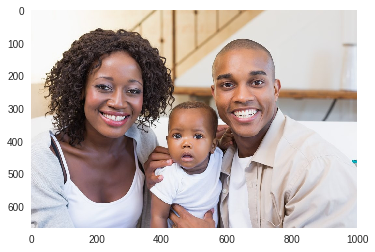

In [7]:
# Leitura da imagem original
img_1 = load_image("imagens/img_2.jpeg")
plt.imshow(img_1)

A função que calcula o HOG na skimage é `skimage.feature.hog(..)`

http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.hog

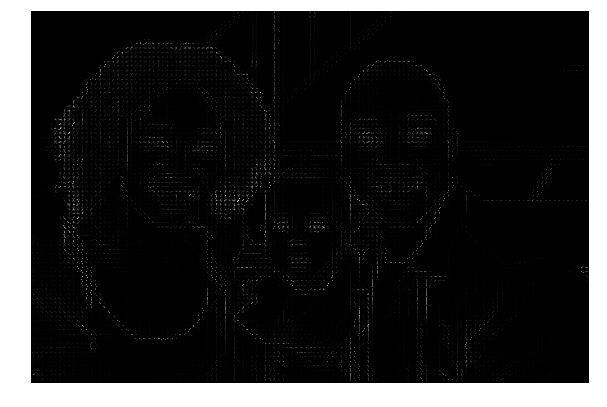

(807003,)


In [8]:
# skimage.feature.hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3) ...)
(hog, hogImage) = feature.hog(img_1[:,:,0], visualise=True, 
                              orientations=9, 
                              pixels_per_cell=(8, 8), 
                              cells_per_block=(3, 3))
plt_img([hogImage])
print(hog.shape)

In [9]:
hog

array([0.        , 0.        , 0.        , ..., 0.0726345 , 0.00850705,
       0.        ])

### Detecção da Face

A biblioteca Dlib implementa a busca de face utilizando um piramid HOG. A *`dlib.get_frontal_face_detector()`* faz uma busca na imagem e compara o mapa HOG com um mapa de face conhecido.

http://dlib.net/imaging.html#get_frontal_face_detector

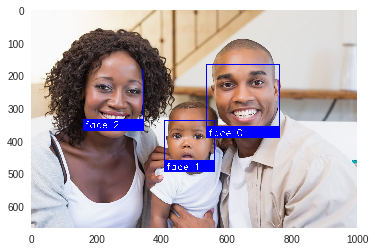

In [10]:
# This function returns an object_detector that is configured to find human faces 
# that are looking more or less towards the camera. 
# It is created using the scan_fhog_pyramid object. 
#
# http://dlib.net/imaging.html#get_frontal_face_detector
#
detector  = dlib.get_frontal_face_detector()

# detect faces using dlib detector
faces_detected = detector(img_1, 1)
faces          = []
frame          = img_1.copy()
# Interator faces in image
for i, d in enumerate(faces_detected):
  # Cropped Face
  faces.append(cropped_face(img_1, d))

  # Draw Rectangle
  frame = draw_rectangle_face(frame, d, 'face {}'.format(i))
plt.imshow(frame)

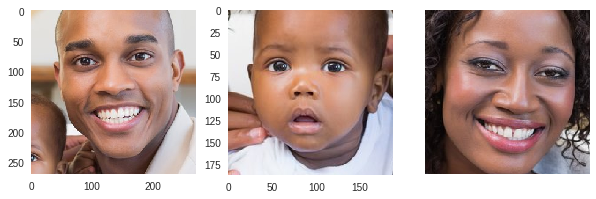

In [11]:
plt_img(faces)

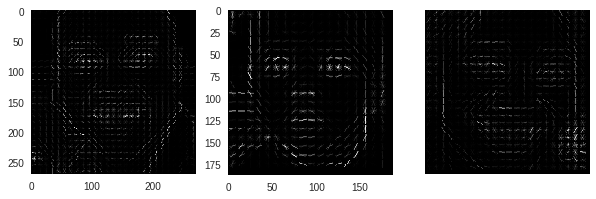

In [12]:
# Print HOG image
faces_hog = [feature.hog(face[:,:,0], visualise=True, pixels_per_cell=(10, 10))[1] for face in faces]
plt_img(faces_hog)

### Alinhamento da Face

Em alguns casos é importante alinhar a face para o treinamento/test, portanto, as imagens faciais do conjunto de dados personalizado também devem estar alinhadas. Aqui, usamos [Dlib](http://dlib.net/) para detecção de face e [OpenCV](https://opencv.org/) para transformação de imagem e recorte para produzir imagens de face RGB NxN alinhadas. 
Usando o utilitário [AlignDlib](http://openface-api.readthedocs.io/en/latest/openface.html) do projeto OpenFace isso é simples:

In [0]:
# Initialize the OpenFace face alignment utility
# http://openface-api.readthedocs.io/en/latest/openface.html
alignment = AlignDlib('models/landmarks.dat')

def align_image(img, size=96):
    return alignment.align(size, img, alignment.getLargestFaceBoundingBox(img), 
                           landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

In [0]:
faces_aligned = [align_image(face) for face in faces]

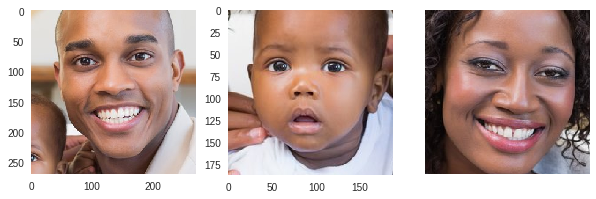

In [15]:
plt_img(faces)

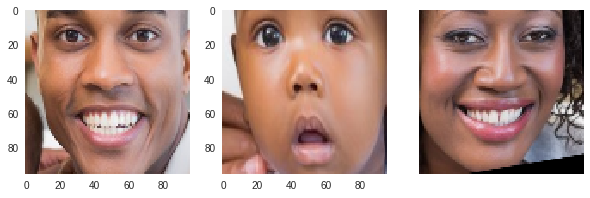

In [16]:
plt_img(faces_aligned)

### Treinamento do Classificador

#### Dataset AffectNet

Utilizando um banco de dados de faces, iremos treinar um classificador para detecção da expressão com base no vetor de características HOG.

Utilizaremos o AffectNet. O AffectNet contém mais de 1 milhão de imagens faciais coletadas da Internet, consultando três dos principais mecanismos de busca que usam 1250 palavras-chave relacionadas a emoções em seis idiomas diferentes. Cerca de metade das imagens recuperadas (~ 440K) foram anotadas manualmente para a presença de sete expressões faciais discretas (modelo categorial) e a intensidade de valência e excitação (modelo dimensional). AffectNet é de longe o maior banco de dados de expressões faciais, valência e excitação na natureza permitindo a pesquisa no reconhecimento de expressão facial automatizado em dois modelos diferentes de emoção. Duas redes neurais profundas de base são usadas para classificar imagens no modelo categórico e prever a intensidade da valência e do despertar. Várias métricas de avaliação mostram que nossas linhas de base de redes neurais profundas podem ter um desempenho melhor do que os métodos convencionais de aprendizado de máquina e sistemas de reconhecimento de expressões faciais disponíveis no mercado.
 
[AffectNet](http://mohammadmahoor.com/affectnet/)

[Facial expression databases](https://en.wikipedia.org/wiki/Facial_expression_databases#cite_note-14)

In [17]:
import os.path
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class IdentityMetadata():
    def __init__(self, base, name, file):
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        if self.name is None:
            return os.path.join(self.base, self.file) 
        else:
            return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

metadata = load_metadata('dataset/affectNetRed')
metadata.shape

(1976,)

Happy


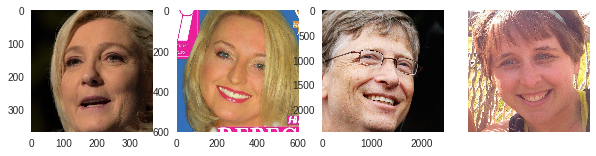

In [18]:
print("Happy")
happy_images = metadata[np.where(np.array([m.name for m in metadata]) == 'happy')]
plt_img([load_image(m.image_path()) for m in happy_images[:4]])

anger


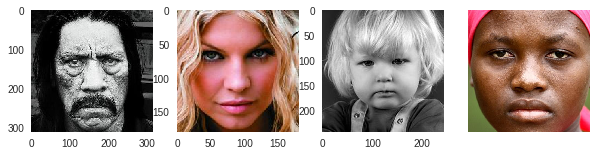

In [19]:
print("anger")
anger_images = metadata[np.where(np.array([m.name for m in metadata]) == 'anger')]
plt_img([load_image(m.image_path()) for m in anger_images[:4]])

sad


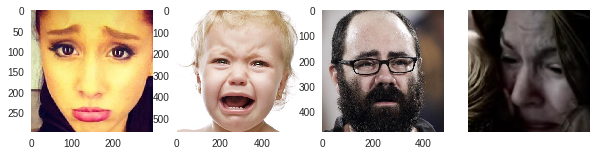

In [20]:
print("sad")
sad_images = metadata[np.where(np.array([m.name for m in metadata]) == 'sad')]
plt_img([load_image(m.image_path()) for m in sad_images[:4]])

surprise


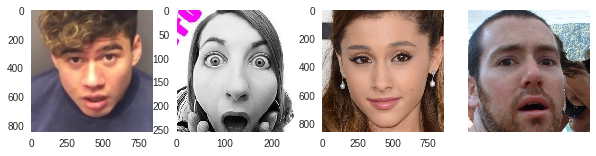

In [21]:
print("surprise")
sad_images = metadata[np.where(np.array([m.name for m in metadata]) == 'surprise')]
plt_img([load_image(m.image_path()) for m in sad_images[:4]])

### Pipeline de Transformação
* Detecção da face, 
* Ajuste de face 
* Cálculo de HOG e predição da expressão

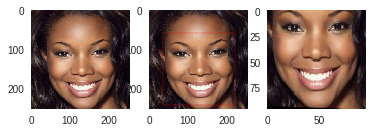

In [22]:
def align_image(img):
    return alignment.align(96, img, alignment.getLargestFaceBoundingBox(img, skipMulti=True), 
                           landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

def image2hog(img):
    return feature.hog(img[:,:,0], pixels_per_cell=(12, 12))

# Load an image of Jacques Chirac
jc_orig = load_image(metadata[8].image_path())

# Detect face and return bounding box
bb = alignment.getLargestFaceBoundingBox(jc_orig)

# Transform image using specified face landmark indices and crop image to 96x96
jc_aligned = alignment.align(96, jc_orig, bb, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

# Show original image
plt.subplot(131)
plt.imshow(jc_orig)

# Show original image with bounding box
plt.subplot(132)
plt.imshow(jc_orig)
plt.gca().add_patch(patches.Rectangle((bb.left(), bb.top()), bb.width(), bb.height(), fill=False, color='red'))

# Show aligned image
plt.subplot(133)
plt.imshow(jc_aligned);

# Calcula HOG
hog = image2hog(jc_aligned)

In [23]:
print(hog)

[0.02709484 0.00577177 0.00139876 ... 0.00746906 0.04605958 0.0293169 ]


#### Extrai o HOG de todas as imagens no Dataset 

NÃO utilizaremos a imagem como entrada, e sim o valor de HOG de cada face para o treinamento supervisionado. 

In [27]:
# Cria subset do dataset original com apenas 500
np.random.seed(42)
sample_metadata = metadata[np.random.randint(len(metadata), size=(500))]

embedded = []
_metadata = []
for i, m in enumerate(sample_metadata):
    print(m.image_path())
    img = load_image(m.image_path())
    img_alig = align_image(img)
    
    if not img_alig is None:
      _metadata.append(m)
      embedded.append(image2hog(img_alig))
    

print("Total: ", sample_metadata.shape)
print("Sample: ", sample_metadata[0].image_path())

dataset/affectNetRed/anger/image0002884.jpg
dataset/affectNetRed/anger/image0000661.jpg
dataset/affectNetRed/surprise/image0003156.jpg
dataset/affectNetRed/anger/image0002275.jpg
dataset/affectNetRed/anger/image0001151.jpg
dataset/affectNetRed/anger/image0003799.jpg
dataset/affectNetRed/sad/image0003500.jpg
dataset/affectNetRed/anger/image0002167.jpg
dataset/affectNetRed/sad/image0000024.jpg
dataset/affectNetRed/happy/image0001432.jpg
dataset/affectNetRed/happy/image0003741.jpg
dataset/affectNetRed/anger/image0002496.jpg
dataset/affectNetRed/happy/image0003761.jpg
dataset/affectNetRed/sad/image0000851.jpg
dataset/affectNetRed/happy/image0002754.jpg
dataset/affectNetRed/anger/image0002971.jpg
dataset/affectNetRed/anger/image0001074.jpg
dataset/affectNetRed/surprise/image0001668.jpg
dataset/affectNetRed/sad/image0003401.jpg
dataset/affectNetRed/happy/image0001183.jpg
dataset/affectNetRed/sad/image0001320.jpg
dataset/affectNetRed/anger/image0000735.jpg
dataset/affectNetRed/surprise/image0

dataset/affectNetRed/sad/image0001980.jpg
dataset/affectNetRed/anger/image0002715.jpg
dataset/affectNetRed/anger/image0003976.jpg
dataset/affectNetRed/anger/image0001812.jpg
dataset/affectNetRed/anger/image0001576.jpg
dataset/affectNetRed/surprise/image0003442.jpg
dataset/affectNetRed/anger/image0003701.jpg
dataset/affectNetRed/sad/image0000914.jpg
dataset/affectNetRed/sad/image0002719.jpg
dataset/affectNetRed/sad/image0004324.jpg
dataset/affectNetRed/surprise/image0002062.jpg
dataset/affectNetRed/happy/image0000904.jpg
dataset/affectNetRed/surprise/image0001313.jpg
dataset/affectNetRed/sad/image0002623.jpg
dataset/affectNetRed/happy/image0003013.jpg
dataset/affectNetRed/happy/image0001219.jpg
dataset/affectNetRed/surprise/image0002534.jpg
dataset/affectNetRed/happy/image0004426.jpg
dataset/affectNetRed/sad/image0002598.jpg
dataset/affectNetRed/surprise/image0000876.jpg
dataset/affectNetRed/anger/image0002275.jpg
dataset/affectNetRed/happy/image0000741.jpg
dataset/affectNetRed/sad/imag

dataset/affectNetRed/sad/image0003710.jpg
dataset/affectNetRed/surprise/image0003530.jpg
dataset/affectNetRed/sad/image0000567.jpg
dataset/affectNetRed/sad/image0003040.jpg
dataset/affectNetRed/surprise/image0002958.jpg
dataset/affectNetRed/sad/image0001961.jpg
dataset/affectNetRed/anger/image0000708.jpg
dataset/affectNetRed/anger/image0000746.jpg
dataset/affectNetRed/surprise/image0001773.jpg
dataset/affectNetRed/surprise/image0001903.jpg
dataset/affectNetRed/happy/image0001175.jpg
dataset/affectNetRed/surprise/image0001452.jpg
dataset/affectNetRed/surprise/image0000390.jpg
dataset/affectNetRed/happy/image0001817.jpg
dataset/affectNetRed/happy/image0003424.jpg
dataset/affectNetRed/anger/image0002293.jpg
dataset/affectNetRed/sad/image0001417.jpg
dataset/affectNetRed/sad/image0001311.jpg
dataset/affectNetRed/surprise/image0000750.jpg
dataset/affectNetRed/sad/image0000023.jpg
dataset/affectNetRed/sad/image0000493.jpg
dataset/affectNetRed/sad/image0002262.jpg
dataset/affectNetRed/surprise

dataset/affectNetRed/sad/image0000443.jpg
dataset/affectNetRed/anger/image0002934.jpg
dataset/affectNetRed/sad/image0004316.jpg
dataset/affectNetRed/sad/image0000915.jpg
dataset/affectNetRed/happy/image0002271.jpg
dataset/affectNetRed/surprise/image0002662.jpg
dataset/affectNetRed/anger/image0000761.jpg
dataset/affectNetRed/sad/image0001583.jpg
dataset/affectNetRed/sad/image0003243.jpg
dataset/affectNetRed/anger/image0000913.jpg
dataset/affectNetRed/anger/image0003880.jpg
dataset/affectNetRed/anger/image0002934.jpg
dataset/affectNetRed/sad/image0003662.jpg
dataset/affectNetRed/sad/image0001613.jpg
dataset/affectNetRed/surprise/image0000369.jpg
dataset/affectNetRed/anger/image0001844.jpg
dataset/affectNetRed/surprise/image0001065.jpg
dataset/affectNetRed/happy/image0001948.jpg
dataset/affectNetRed/happy/image0000400.jpg
dataset/affectNetRed/surprise/image0002854.jpg
dataset/affectNetRed/happy/image0001269.jpg
dataset/affectNetRed/sad/image0004161.jpg
dataset/affectNetRed/surprise/image0

dataset/affectNetRed/surprise/image0003086.jpg
dataset/affectNetRed/anger/image0004127.jpg
dataset/affectNetRed/sad/image0004472.jpg
dataset/affectNetRed/surprise/image0002532.jpg
dataset/affectNetRed/happy/image0000400.jpg
dataset/affectNetRed/surprise/image0003905.jpg
dataset/affectNetRed/anger/image0002668.jpg
dataset/affectNetRed/happy/image0004437.jpg
dataset/affectNetRed/sad/image0001155.jpg
dataset/affectNetRed/happy/image0004338.jpg
dataset/affectNetRed/anger/image0002826.jpg
dataset/affectNetRed/anger/image0003414.jpg
dataset/affectNetRed/anger/image0002844.jpg
dataset/affectNetRed/happy/image0002261.jpg
dataset/affectNetRed/anger/image0003155.jpg
dataset/affectNetRed/anger/image0002466.jpg
dataset/affectNetRed/sad/image0000850.jpg
dataset/affectNetRed/surprise/image0000876.jpg
dataset/affectNetRed/happy/image0002314.jpg
dataset/affectNetRed/anger/image0000535.jpg
dataset/affectNetRed/happy/image0000682.jpg
dataset/affectNetRed/happy/image0003074.jpg
dataset/affectNetRed/happy

dataset/affectNetRed/sad/image0002190.jpg
dataset/affectNetRed/happy/image0004338.jpg
dataset/affectNetRed/anger/image0003528.jpg
dataset/affectNetRed/sad/image0002302.jpg
dataset/affectNetRed/surprise/image0000876.jpg
dataset/affectNetRed/surprise/image0000069.jpg
dataset/affectNetRed/sad/image0000676.jpg
dataset/affectNetRed/surprise/image0003410.jpg
dataset/affectNetRed/anger/image0003737.jpg
dataset/affectNetRed/anger/image0003347.jpg
dataset/affectNetRed/sad/image0000246.jpg
dataset/affectNetRed/happy/image0003495.jpg
dataset/affectNetRed/anger/image0003120.jpg
dataset/affectNetRed/anger/image0002152.jpg
dataset/affectNetRed/happy/image0003871.jpg
dataset/affectNetRed/happy/image0002232.jpg
dataset/affectNetRed/anger/image0000837.jpg
dataset/affectNetRed/anger/image0002971.jpg
dataset/affectNetRed/surprise/image0003686.jpg
dataset/affectNetRed/happy/image0003927.jpg
dataset/affectNetRed/sad/image0002859.jpg
dataset/affectNetRed/sad/image0004405.jpg
dataset/affectNetRed/anger/image

## Exercício

Construa um **classificador** que utilize as** features extraidas do HOG**  para predizer a expressão facial em uma imagem. 
* Calcule o HOG das imagens do vetor `sample_metadata` e utilize como features
* Calcule e compare a acurácia da rede para o dataset apresentado e exiba a matriz de confusão
* Altere os parâmetros do cálculo do HOG e observe as mudanças na acurácia do **classificador**
*  Exiba alguns exemplos em imagens reais, veja as imagens na pasta `images/`

In [0]:
# .................

In [47]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

targets = np.array([m.name for m in _metadata])
encoder = LabelEncoder()

y = encoder.fit_transform(targets)
y = to_categorical(y)

x = np.array(embedded)

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(x, y, test_size = 0.3, random_state = 0)\


(X_TRAIN.shape, X_TEST.shape)

((341, 2916), (147, 2916))

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

def createModel():
  model = Sequential()
  model.add(Dense(52, activation='relu', input_dim=X_TRAIN.shape[1]))
  model.add(Dropout(0.2))
  
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(y.shape[1], activation='softmax'))

  model.summary()

  return model

In [58]:
#X_TRAIN, X_TEST, Y_TRAIN, Y_TEST
model1 = createModel()
batch_size = 256
epochs = 100
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
 
history = model1.fit(X_TRAIN, Y_TRAIN, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(X_TEST, Y_TEST))
 
model1.evaluate(X_TEST, Y_TEST)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 52)                151684    
_________________________________________________________________
dropout_11 (Dropout)         (None, 52)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               27136     
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 2052      
_________________________________________________________________
dropout_13 (Dropout)         (None, 4)                 0         
Total params: 180,872
Trainable params: 180,872
Non-trainable params: 0
_________________________________________________________________
Trai

Epoch 18/100
341/341 [==============================] - 0s 66us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993
Epoch 19/100
341/341 [==============================] - 0s 67us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993
Epoch 20/100
341/341 [==============================] - 0s 83us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993
Epoch 21/100
341/341 [==============================] - 0s 90us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993
Epoch 22/100
341/341 [==============================] - 0s 78us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993
Epoch 23/100
341/341 [==============================] - 0s 76us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993
Epoch 24/100
341/341 [==============================] - 0s 79us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993

341/341 [==============================] - 0s 68us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993
Epoch 40/100
341/341 [==============================] - 0s 68us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993
Epoch 41/100
341/341 [==============================] - 0s 78us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993
Epoch 42/100
341/341 [==============================] - 0s 72us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993
Epoch 43/100
341/341 [==============================] - 0s 65us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993
Epoch 44/100
341/341 [==============================] - 0s 71us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993
Epoch 45/100
341/341 [==============================] - 0s 64us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993
Epoch 46/100

Epoch 62/100
341/341 [==============================] - 0s 72us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993
Epoch 63/100
341/341 [==============================] - 0s 70us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993
Epoch 64/100
341/341 [==============================] - 0s 61us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993
Epoch 65/100
341/341 [==============================] - 0s 62us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993
Epoch 66/100
341/341 [==============================] - 0s 75us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993
Epoch 67/100
341/341 [==============================] - 0s 64us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993
Epoch 68/100
341/341 [==============================] - 0s 92us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993

Epoch 84/100
341/341 [==============================] - 0s 84us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993
Epoch 85/100
341/341 [==============================] - 0s 74us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993
Epoch 86/100
341/341 [==============================] - 0s 81us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993
Epoch 87/100
341/341 [==============================] - 0s 83us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993
Epoch 88/100
341/341 [==============================] - 0s 87us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993
Epoch 89/100
341/341 [==============================] - 0s 79us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993
Epoch 90/100
341/341 [==============================] - 0s 86us/step - loss: 1.1921e-07 - acc: 0.2434 - val_loss: 1.1921e-07 - val_acc: 0.2993

[1.1920930376163597e-07, 0.29931972626926134]

Text(0.5,1,'Accuracy Curves')

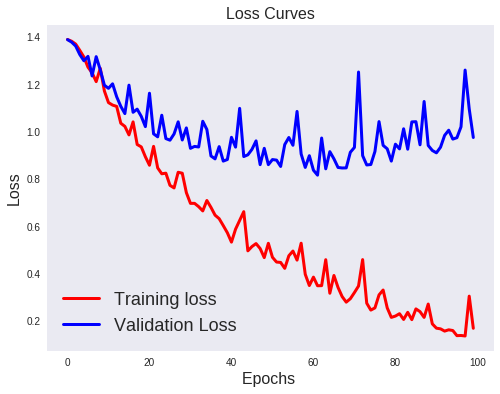

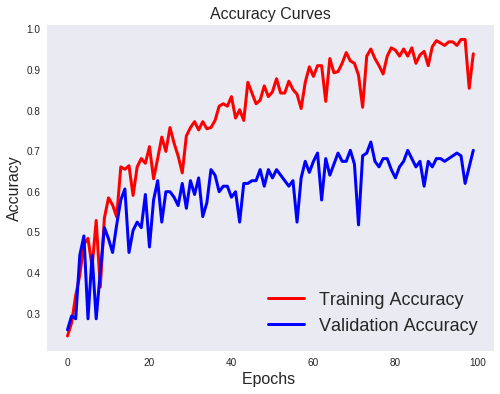

In [56]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)